Bag-of-Words and Skip-gram

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example sentences
sentences = [
    ["I", "love", "chocolate"],
    ["I", "love", "ice", "cream"],
    ["I", "enjoy", "playing", "tennis"]
]

# Create vocabulary
vocab = set([word for sentence in sentences for word in sentence])
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for idx, word in enumerate(vocab)}
vocab_size = len(vocab)

# Generate training data
window_size = 4
train_data = []
for sentence in sentences:
    for i, target_word in enumerate(sentence):
        context_words = [sentence[j] for j in range(max(0, i - window_size), min(i + window_size + 1,len(sentence) )) if j>=0 and j != i]
        train_data.append((context_words, target_word))

print(train_data)

# Generate input and output pairs for CBOW
train_inputs, train_labels = [], []
for context_words, target_word in train_data:
    context_idxs = [word2idx[word] for word in context_words]
    train_inputs.append(context_idxs)
    train_labels.append(word2idx[target_word])

# print(train_inputs, train_labels)

# Convert to numpy arrays
train_inputs = pad_sequences(train_inputs, maxlen=window_size*2)
train_labels = np.array(train_labels)

# print(train_inputs, train_labels)
# Define CBOW model
embedding_dim = 10
cbow_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=window_size*2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=vocab_size, activation='softmax')
])

# Compile and train the CBOW model
cbow_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
cbow_model.fit(train_inputs, train_labels, epochs=10, verbose=1)

# Get the learned word embeddings
word_embeddings = cbow_model.get_weights()[0]

# Print the word embeddings
for i, embedding in enumerate(word_embeddings):
    word = idx2word[i]
    print(f"Word: {word}, Embedding: {embedding}")






from sklearn.metrics.pairwise import cosine_similarity

embedding_love = [ 0.01564056, -0.03947877, 0.05002572, 0.0192697, -0.02804992, 0.01769353,
  0.05988177, -0.02112248, 0.01724979, 0.00679414]

embedding_chocolate = [ 0.03700837, 0.02216908, -0.00719608, -0.03232071, -0.02043956, 0.01372782,
 -0.03494259, 0.04141612, -0.02659426, 0.00182522]

similarity = cosine_similarity([embedding_love], [embedding_chocolate])
print(similarity)




import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

# Set up the training data
sentences = [["I", "love", "machine", "learning"],
             ["I", "like", "deep", "learning"],
             ["I", "enjoy", "neural", "networks"]]

# Create the skip-gram dataset
skip_gram_pairs = []
window_size = 2

for sentence in sentences:
    for i in range(len(sentence)):
        target_word = sentence[i]
        for j in range(i - window_size, i + window_size + 1):
            if j >= 0 and j < len(sentence) and j != i:
                context_word = sentence[j]
                skip_gram_pairs.append((target_word, context_word))

# Create word-to-index and index-to-word mappings
word_to_index = {}
index_to_word = {}
index = 0

for sentence in sentences:
    for word in sentence:
        if word not in word_to_index:
            word_to_index[word] = index
            index_to_word[index] = word
            index += 1

# Convert skip-gram pairs to indices
skip_gram_pairs_indices = []
for pair in skip_gram_pairs:
    target_index = word_to_index[pair[0]]
    context_index = word_to_index[pair[1]]
    skip_gram_pairs_indices.append((target_index, context_index))

# Define the model
vocab_size = len(word_to_index)
embedding_dim = 10

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=1))
model.add(Flatten())
model.add(Dense(vocab_size, activation='softmax'))

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam')
target_words = []
context_words = []

for pair in skip_gram_pairs_indices:
    target_words.append(pair[0])
    context_words.append(pair[1])

target_words = np.array(target_words)
context_words = np.array(context_words)

model.fit(target_words, tf.keras.utils.to_categorical(context_words, num_classes=vocab_size), epochs=100)

# Get the word embeddings
embeddings = model.get_weights()[0]

# Print the word embeddings
for i in range(vocab_size):
    word = index_to_word[i]
    embedding = embeddings[i]
    print(f"Word: {word}, Embedding: {embedding}")


[(['love', 'chocolate'], 'I'), (['I', 'chocolate'], 'love'), (['I', 'love'], 'chocolate'), (['love', 'ice', 'cream'], 'I'), (['I', 'ice', 'cream'], 'love'), (['I', 'love', 'cream'], 'ice'), (['I', 'love', 'ice'], 'cream'), (['enjoy', 'playing', 'tennis'], 'I'), (['I', 'playing', 'tennis'], 'enjoy'), (['I', 'enjoy', 'tennis'], 'playing'), (['I', 'enjoy', 'playing'], 'tennis')]
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step - loss: 2.0893
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.0861
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 2.0829
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.0797
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.0766
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 2.0734
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2.0704
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.0673
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 2.0643
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2.0612
Word: playing, Embedding: [ 0.03818788  0.04803824 -0.01725297 -0.0005864   0.01452589  0.0257194
  0.01003688  0.0428013  -0.03665021 -0.0302188 ]
Word: chocolate, Embedding: [ 0.02790711  0.00130038 -0.04334898  0.05376975  0.01807557 -0.04022905
 -0.03985202  0.0182756   0.0324712  -0.05344879]
Word: I, Embedding: [-0.0540759  -0.02008083 -0.01722616 -0.01114364  

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step - loss: 2.2007
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 2.1990
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 2.1973
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 2.1956
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 2.1939
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 2.1923
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 2.1906
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 2.1889
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 2.1872
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 2.1856
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 2.1839
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 2.1822
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 2.1805
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 2.1789
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 2.1772
Epoch 16/100
1/1 ━━━━━━━━━

Embedding Models: Global Vector (GloVe) for Word representations

In [ ]:
from collections import defaultdict
import numpy as np
corpus = [    "I love chocolate",    "I love ice cream",    "I enjoy playing tennis"]
# Initialize vocabulary and co-occurrence matrix
vocab = set()
co_occurrence = defaultdict(float)

window_size = 4
# Iterate through the corpus to build vocabulary and co-occurrence matrix
for sentence in corpus:
    words = sentence.split()
    for i in range(len(words)):
        word = words[i]
        vocab.add(word)
        for j in range(max(0, i - window_size), min(i + window_size + 1, len(words))):
            if i != j:
                co_occurrence[(word, words[j])] += 1.0 / abs(i - j)


embedding_dim = 10
word_embeddings = {
    word: np.random.randn(embedding_dim) for word in vocab
}


learning_rate = 0.1
num_epochs = 100

# Gradient descent to update word embeddings
for epoch in range(num_epochs):
    total_loss = 0
    for (word_i, word_j), observed_count in co_occurrence.items():
        # Calculate dot product of word embeddings
        dot_product = np.dot(word_embeddings[word_i], word_embeddings[word_j])

        # Calculate difference and update
        diff = dot_product - np.log(observed_count)
        total_loss += 0.5 * diff**2
        gradient = diff * word_embeddings[word_j]
        word_embeddings[word_i] -= learning_rate * gradient

    print(f"Epoch: {epoch+1}, Loss: {total_loss}")

word_embeddings

Epoch: 1, Loss: 74.70003523232256
Epoch: 2, Loss: 9.913120373102931
Epoch: 3, Loss: 1.82895234047742
Epoch: 4, Loss: 0.2766576031710931
Epoch: 5, Loss: 0.03811643263179443
Epoch: 6, Loss: 0.005418332213004243
Epoch: 7, Loss: 0.0009769121957408488
Epoch: 8, Loss: 0.0002414042372399103
Epoch: 9, Loss: 7.461839347529114e-05
Epoch: 10, Loss: 2.5616952242553137e-05
Epoch: 11, Loss: 9.167569085547892e-06
Epoch: 12, Loss: 3.3347888535251396e-06
Epoch: 13, Loss: 1.2213567773450623e-06
Epoch: 14, Loss: 4.4868895158259814e-07
Epoch: 15, Loss: 1.6507438118374013e-07
Epoch: 16, Loss: 6.077507933570181e-08
Epoch: 17, Loss: 2.238352337830375e-08
Epoch: 18, Loss: 8.245394254798643e-09
Epoch: 19, Loss: 3.0376337825066694e-09
Epoch: 20, Loss: 1.1191297327163036e-09
Epoch: 21, Loss: 4.123217346896019e-10
Epoch: 22, Loss: 1.5191390482789948e-10
Epoch: 23, Loss: 5.5970814496687093e-11
Epoch: 24, Loss: 2.0621827245515497e-11
Epoch: 25, Loss: 7.597896523851335e-12
Epoch: 26, Loss: 2.799367784506319e-12
Epoc

{'playing': array([ 1.93862784,  1.79227795, -0.67208242, -1.08352987, -0.51871252,
        -0.7411755 ,  0.66550474, -0.89546222, -0.5923469 , -0.42266615]),
 'chocolate': array([-0.02735308, -1.94252469,  1.96100323,  0.35966285, -1.15774506,
         1.08189305,  0.61571753,  0.78514437,  1.06464085, -1.69673428]),
 'I': array([-0.94959786,  0.58344743, -0.23347866, -0.1483814 ,  0.66121964,
         0.36694681,  0.11164074,  1.01332535, -1.31233964, -1.07666253]),
 'tennis': array([ 0.10481994,  0.37562519, -1.72254012, -0.80790366, -0.58327033,
         0.42832469, -1.21524617,  1.08147389,  1.90494079, -0.0259371 ]),
 'love': array([-2.42866842, -0.64484401,  0.12334748, -0.8060781 , -0.68904513,
        -1.39548096,  0.32090775, -0.35181403, -0.13354906,  0.19931514]),
 'cream': array([ 0.06567057, -0.31129425, -1.8881244 ,  1.1767741 ,  0.24373133,
         0.36631716,  1.74857863, -1.11719736, -0.2211207 ,  0.71493683]),
 'ice': array([-0.15459845,  0.02292638,  0.88420208, -0

Measure Embeddings cosine similarity scores for determining the similar context into Contextual Language Models

In [ ]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
# Load an open-source embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')  # You can replace with another model if needed

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    return dot_product / (norm_vector1 * norm_vector2)

def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

def get_embedding(word):
    """
    Gets the embedding for a given word using SentenceTransformer.
    """
    return model.encode(word)

# Define your words
# words = ["mouse", "pizza", "rome", "italian", "Italy", "italy"]
words = ["I", "love" ,"chocolate", "ice cream", "enjoy", "playing", "tennis"]
base_word = "Me"

# Construct DataFrame
df = pd.DataFrame(words, columns=["word_1"])
df["word_2"] = base_word

# Precompute embeddings for efficiency
embeddings = {word: get_embedding(word) for word in words + [base_word]}

# Compute similarity metrics
df["cosine_similarity"] = df.apply(lambda r: cosine_similarity(embeddings[r.word_1], embeddings[r.word_2]), axis=1)
df["euclidean_distance"] = df.apply(lambda r: euclidean_distance(embeddings[r.word_1], embeddings[r.word_2]), axis=1)

print(df)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

      word_1 word_2  cosine_similarity  euclidean_distance
0          I     Me           0.653914            0.831969
1       love     Me           0.373178            1.119663
2  chocolate     Me           0.267308            1.210530
3  ice cream     Me           0.237702            1.234745
4      enjoy     Me           0.198246            1.266297
5    playing     Me           0.329232            1.158247
6     tennis     Me           0.166011            1.291502


Example of Completing Contextual Langauge Processing

['Un', 'bel', 'iev', 'able', '!']


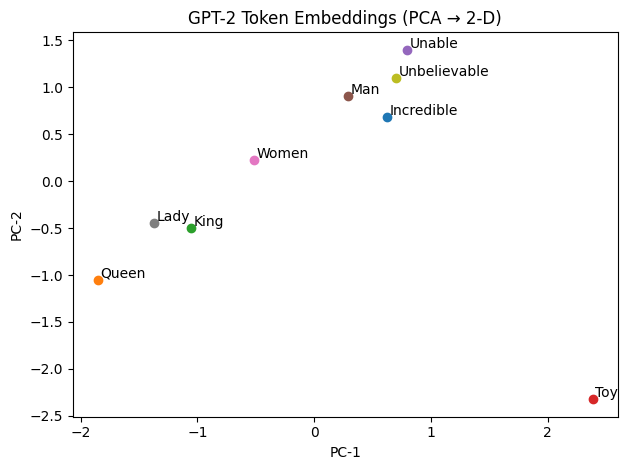

Incredible: [-0.079 -0.026  0.043 -0.106 -0.082]
Queen: [ 0.119 -0.138  0.236  0.006 -0.087]
 King: [ 0.102 -0.138  0.262 -0.051 -0.118]
  Toy: [ 0.333 -0.106  0.223 -0.105 -0.278]
Unable: [0.072 0.067 0.067 0.044 0.056]
  Man: [-0.028 -0.056  0.065 -0.017 -0.081]
Women: [-0.024  0.12   0.035 -0.014  0.01 ]
 Lady: [ 0.017 -0.1    0.164 -0.202  0.073]
Unbelievable: [0.032 0.024 0.097 0.028 0.036]


In [ ]:
# !pip install torch transformers scikit-learn matplotlib --quiet

# =========================
# 1. Setup
# =========================
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA   # swap for TSNE if you prefer
from transformers import AutoTokenizer

#----- text examples ----------
# Text to tokenize
text = "Unbelievable!"

# Initialize GPT-2 tokenizer
tok = AutoTokenizer.from_pretrained("gpt2")

# Tokenize the text and print the tokens
# This will split the text into subword tokens that GPT-2 can understand
print(tok.tokenize(text))    # Output: ['Un', 'bel', 'iev', 'able', '!']
#------------------------------

# =========================
# 2. Load Model and Tokenizer
# =========================
model_name = "gpt2"                     # Model to be used

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(
    model_name,
    torch_dtype=torch.float16,          # keeps RAM low without hurting the embeddings
    low_cpu_mem_usage=True,
    ).eval()                            # Puts the model in evaluation mode

# =========================
# 3. Tokenize & Create vector embedding
# =========================
WORDS = ["Incredible", "Queen", "King", "Toy", "Unable", "Man", "Women", "Lady", "Unbelievable"]        # Words to be tokenised

embed_vectors = []
for word in WORDS:
    ids          = tok(word, add_special_tokens=False)["input_ids"]
    ids_t        = torch.tensor(ids).unsqueeze(0)         # shape: (1, tokens)
    with torch.no_grad():
        token_vecs = model.get_input_embeddings()(ids_t)  # shape: (1, tokens, 768)
    # Pool sub-word pieces → single 768-D vector (mean works fine for single words)
    embed_vectors.append(token_vecs.mean(dim=1).squeeze().cpu().numpy())

vecs = np.stack(embed_vectors)             # List -> Matrix | shape: (len(WORDS), 768)

# =========================
# 4. PCA (Reduce to 2-D) & Visualisation
# =========================

coords = PCA(n_components=2, random_state=0).fit_transform(vecs)

plt.figure()
for (x, y), label in zip(coords, WORDS):
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, label)
plt.title("GPT-2 Token Embeddings (PCA → 2-D)")
plt.xlabel("PC-1");  plt.ylabel("PC-2");  plt.tight_layout();  plt.show()

# Print the first few dimensions of the vectors
for w, v in zip(WORDS, vecs):
    print(f"{w:>5}: {np.round(v[:5], 3)}")

In [ ]:
import torch

# Define sequence length and embedding dimension
seq_len, d_model = 10, 8  # seq_len: number of positions, d_model: embedding dimension

# Create position indices tensor of shape (seq_len, 1)
pos = torch.arange(seq_len).unsqueeze(1)  # [[0], [1], [2], ..., [9]]

# Create dimension indices for even dimensions: [0, 2, 4, 6]
idx = torch.arange(0, d_model, 2)

# Calculate frequency/angle rates for each dimension
# As idx/d_model increases, 10000^(idx/d_model) increases exponentially
# This creates frequencies that vary from high (small idx) to low (large idx)
angle_rates = 1 / (10000 ** (idx / d_model))

# Initialize positional encoding matrix of shape (seq_len, d_model)
pe = torch.zeros(seq_len, d_model)

# Fill even indices with sine and odd indices with cosine
# pos * angle_rates creates a matrix of angles by broadcasting
pe[:, 0::2] = torch.sin(pos * angle_rates)  # sin for even dimensions (0,2,4,6)
pe[:, 1::2] = torch.cos(pos * angle_rates)  # cos for odd dimensions (1,3,5,7)

pe

tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
          1.0000e+00,  0.0000e+00,  1.0000e+00],
        [ 8.4147e-01,  5.4030e-01,  9.9833e-02,  9.9500e-01,  9.9998e-03,
          9.9995e-01,  1.0000e-03,  1.0000e+00],
        [ 9.0930e-01, -4.1615e-01,  1.9867e-01,  9.8007e-01,  1.9999e-02,
          9.9980e-01,  2.0000e-03,  1.0000e+00],
        [ 1.4112e-01, -9.8999e-01,  2.9552e-01,  9.5534e-01,  2.9995e-02,
          9.9955e-01,  3.0000e-03,  1.0000e+00],
        [-7.5680e-01, -6.5364e-01,  3.8942e-01,  9.2106e-01,  3.9989e-02,
          9.9920e-01,  4.0000e-03,  9.9999e-01],
        [-9.5892e-01,  2.8366e-01,  4.7943e-01,  8.7758e-01,  4.9979e-02,
          9.9875e-01,  5.0000e-03,  9.9999e-01],
        [-2.7942e-01,  9.6017e-01,  5.6464e-01,  8.2534e-01,  5.9964e-02,
          9.9820e-01,  6.0000e-03,  9.9998e-01],
        [ 6.5699e-01,  7.5390e-01,  6.4422e-01,  7.6484e-01,  6.9943e-02,
          9.9755e-01,  6.9999e-03,  9.9998e-01],
        [ 9.8936

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch.nn.functional as F

# Initialize model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

# Print total number of tokens in GPT-2's vocabulary
print("GPT-2 vocab size:", tokenizer.vocab_size) # (should be 50257)

# Get vocabulary as list of (token, id) tuples and shuffle randomly
vocab_items = list(tokenizer.get_vocab().items())
np.random.shuffle(vocab_items)

# Print first 10 random token-ID pairs from vocabulary
# Token is displayed with repr() to show special characters/whitespace
print("\nSample of token→ID mappings:")
for token, idx in vocab_items[:10]:
    print(f"{idx:5d} → {repr(token)}")

# Input text to predict next token for
text = "Hello, how are you"

# Tokenize input
inputs = tokenizer(text, return_tensors="pt")

# Get model predictions
with torch.no_grad():  # No need to track gradients for inference
    outputs = model(**inputs)

# Get logits for last token
logits = outputs.logits[:, -1, :]  # Shape: [batch_size, vocab_size] -> torch.Size([1, 50257]) in this case

# Get raw logits for top 5 tokens before softmax
top_k = 5
top_logits, top_indices = torch.topk(logits[0], top_k)

# Convert logits to probabilities using softmax
probs = F.softmax(logits, dim=-1)

# Get top 5 probabilities after softmax
top_probs = probs[0][top_indices]

print(f"\nTop {top_k} predictions for next token after '{text}':")
print("-" * 50)
print("Raw Logits vs Softmax Probabilities")
print("-" * 50)
for logit, prob, idx in zip(top_logits, top_probs, top_indices):
    token = tokenizer.decode([idx])
    print(f"Token ID: {idx} | Token: {token:10} | Logit: {logit:.4f} | Probability: {prob:.4f}")



GPT-2 vocab size: 50257

Sample of token→ID mappings:
44798 → 'Termin'
46902 → 'ĠSpiegel'
10783 → 'Ġought'
47301 → 'Ġfumes'
31728 → 'Ġsaints'
34799 → 'Ġjung'
22417 → 'Filter'
39232 → 'Repl'
38160 → 'FontSize'
44915 → 'Ġbunny'

Top 5 predictions for next token after 'Hello, how are you':
--------------------------------------------------
Raw Logits vs Softmax Probabilities
--------------------------------------------------
Token ID: 1804 | Token:  doing     | Logit: -93.1168 | Probability: 0.2651
Token ID: 30 | Token: ?          | Logit: -93.6843 | Probability: 0.1503
Token ID: 4203 | Token:  feeling   | Logit: -93.7024 | Probability: 0.1476
Token ID: 1701 | Token: ?"         | Logit: -94.3397 | Probability: 0.0780
Token ID: 11 | Token: ,          | Logit: -95.1794 | Probability: 0.0337


----
# Homework

1. สร้างประโยคใหม่ "I am good at anwsering questions and I can take the test and pass the finance exam." จงนำ Contextual sentences แปลงเป็น Embeddings (ด้วยวิธีใดก็ได้) และให้คะแนนความคล้าย (Similarity score) ด้วยการวัดแบบ Euclidean และ Cosine similarity

2. นำประโยคเพียง "I am good at anwsering questions and I can take the test and pass the finance" ไปทำแปลงผ่าน Autotokenizer เป็น Embedding vectors ด้วยโมเดล GPT-2 และสร้างคำใหม่ผ่าน GPT-2 เช่นกัน ผลลัพธ์ที่ได้เป็นคำใดต่อไปใน 10 อันดับแรกของการทำนาย (Top-10) มีความน่าจะเป็นเท่าใด

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModel
import torch
import torch.nn.functional as F
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

print("Libraries imported successfully")

Libraries imported successfully


In [4]:
# Question 1
print("\n" + "="*60)
print("Question 1: Sentence Embedding and Similarity Analysis")
print("="*60)

# Define the new sentence and contextual sentences from previous examples
new_sentence = "I am good at anwsering questions and I can take the test and pass the finance exam."

# Contextual sentences from the notebook examples
contextual_sentences = [
    "I love chocolate",
    "I love ice cream", 
    "I enjoy playing tennis",
    "I love machine learning",
    "I like deep learning",
    "I enjoy neural networks"
]

print(f"Target sentence: '{new_sentence}'")
print(f"\nContextual sentences for comparison:")
for i, sent in enumerate(contextual_sentences, 1):
    print(f"  {i}. '{sent}'")

# Load SentenceTransformer model for creating embeddings
print(f"\nLoading SentenceTransformer model...")
model = SentenceTransformer('all-MiniLM-L6-v2')

# Create embeddings for all sentences
print(f"Creating embeddings...")
all_sentences = [new_sentence] + contextual_sentences
embeddings = model.encode(all_sentences)

# Extract target embedding and contextual embeddings
target_embedding = embeddings[0]
contextual_embeddings = embeddings[1:]

print(f"Embeddings created successfully!")
print(f"   - Target embedding shape: {target_embedding.shape}")
print(f"   - Each contextual embedding shape: {contextual_embeddings[0].shape}")

# Define similarity functions
def cosine_similarity_manual(vec1, vec2):
    """Calculate cosine similarity manually"""
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

def euclidean_distance(vec1, vec2):
    """Calculate Euclidean distance"""
    return np.linalg.norm(vec1 - vec2)

# Calculate similarity scores
print(f"\nSIMILARITY ANALYSIS:")
print(f"="*50)

results = []
for i, (sentence, context_embedding) in enumerate(zip(contextual_sentences, contextual_embeddings)):
    # Calculate similarities
    cosine_sim = cosine_similarity_manual(target_embedding, context_embedding)
    euclidean_dist = euclidean_distance(target_embedding, context_embedding)
    
    # Store results
    results.append({
        'sentence': sentence,
        'cosine_similarity': cosine_sim,
        'euclidean_distance': euclidean_dist
    })
    
    print(f"\nSentence {i+1}: '{sentence}'")
    print(f"  🔸 Cosine Similarity: {cosine_sim:.6f}")
    print(f"  🔸 Euclidean Distance: {euclidean_dist:.6f}")

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('cosine_similarity', ascending=False)

print(f"\nRANKING BY SIMILARITY:")
print(f"="*50)
print(f"{'Rank':<4} {'Cosine Sim':<12} {'Euclidean Dist':<15} {'Sentence'}")
print(f"-"*70)

for rank, (_, row) in enumerate(results_df.iterrows(), 1):
    print(f"{rank:<4} {row['cosine_similarity']:<12.6f} {row['euclidean_distance']:<15.6f} '{row['sentence']}'")

# Summary statistics
print(f"\nSUMMARY STATISTICS:")
print(f"="*50)
print(f"Cosine Similarity:")
print(f"  • Highest: {results_df['cosine_similarity'].max():.6f}")
print(f"  • Lowest: {results_df['cosine_similarity'].min():.6f}")
print(f"  • Average: {results_df['cosine_similarity'].mean():.6f}")

print(f"\nEuclidean Distance:")
print(f"  • Smallest: {results_df['euclidean_distance'].min():.6f}")
print(f"  • Largest: {results_df['euclidean_distance'].max():.6f}")
print(f"  • Average: {results_df['euclidean_distance'].mean():.6f}")

print(f"\nINTERPRETATION:")
print(f"- Higher cosine similarity = more similar meaning")
print(f"- Lower euclidean distance = more similar vectors")
print(f"- Most similar sentence: '{results_df.iloc[0]['sentence']}'")
print(f"- Least similar sentence: '{results_df.iloc[-1]['sentence']}'")


Question 1: Sentence Embedding and Similarity Analysis
Target sentence: 'I am good at anwsering questions and I can take the test and pass the finance exam.'

Contextual sentences for comparison:
  1. 'I love chocolate'
  2. 'I love ice cream'
  3. 'I enjoy playing tennis'
  4. 'I love machine learning'
  5. 'I like deep learning'
  6. 'I enjoy neural networks'

Loading SentenceTransformer model...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\Tanaphat\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Tanaphat\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Creating embeddings...
Embeddings created successfully!
   - Target embedding shape: (384,)
   - Each contextual embedding shape: (384,)

SIMILARITY ANALYSIS:

Sentence 1: 'I love chocolate'
  🔸 Cosine Similarity: 0.024695
  🔸 Euclidean Distance: 1.396642

Sentence 2: 'I love ice cream'
  🔸 Cosine Similarity: -0.032132
  🔸 Euclidean Distance: 1.436755

Sentence 3: 'I enjoy playing tennis'
  🔸 Cosine Similarity: 0.086813
  🔸 Euclidean Distance: 1.351434

Sentence 4: 'I love machine learning'
  🔸 Cosine Similarity: 0.081284
  🔸 Euclidean Distance: 1.355519

Sentence 5: 'I like deep learning'
  🔸 Cosine Similarity: 0.082555
  🔸 Euclidean Distance: 1.354581

Sentence 6: 'I enjoy neural networks'
  🔸 Cosine Similarity: 0.143270
  🔸 Euclidean Distance: 1.308992

RANKING BY SIMILARITY:
Rank Cosine Sim   Euclidean Dist  Sentence
----------------------------------------------------------------------
1    0.143270     1.308992        'I enjoy neural networks'
2    0.086813     1.351434        'I

In [ ]:
# Question 2
print("\n" + "="*60)
print("Question 2: GPT-2 Token Analysis and Text Generation")
print("="*60)

# Define the input text
input_text = "I am good at anwsering questions and I can take the test and pass the finance"

print(f"Input text: '{input_text}'")

# Load GPT-2 tokenizer and model
print(f"\nLoading GPT-2 tokenizer and model...")
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model_causal = AutoModelForCausalLM.from_pretrained("gpt2")
model_embed = AutoModel.from_pretrained("gpt2")

# Add padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

print(f"Models loaded successfully!")
print(f"   - GPT-2 vocab size: {tokenizer.vocab_size}")

# Part A: Tokenization Analysis
print(f"\nTOKENIZATION ANALYSIS:")
print(f"="*40)

# Tokenize the text
tokens = tokenizer.tokenize(input_text)
token_ids = tokenizer.encode(input_text, add_special_tokens=False)

print(f"Original text: '{input_text}'")
print(f"Number of tokens: {len(tokens)}")
print(f"\nTokens breakdown:")
for i, (token, token_id) in enumerate(zip(tokens, token_ids)):
    print(f"  {i+1:2d}. Token: {repr(token):>15} | ID: {token_id:>5d}")

# Part B: Create Embedding Vectors
print(f"\nEMBEDDING VECTORS ANALYSIS:")
print(f"="*40)

# Tokenize for model input
inputs = tokenizer(input_text, return_tensors="pt", add_special_tokens=False)
input_ids = inputs["input_ids"]

print(f"Input shape: {input_ids.shape}")

# Get embeddings from the model
with torch.no_grad():
    # Method 1: Get embeddings from embedding layer
    token_embeddings = model_embed.get_input_embeddings()(input_ids)
    
    # Method 2: Get contextual embeddings from full model
    outputs = model_embed(**inputs)
    contextual_embeddings = outputs.last_hidden_state

print(f"Token embeddings shape: {token_embeddings.shape}")
print(f"Contextual embeddings shape: {contextual_embeddings.shape}")

# Show first few dimensions of embeddings for first few tokens
print(f"\nFirst 5 dimensions of token embeddings:")
for i, (token, embedding) in enumerate(zip(tokens[:5], token_embeddings[0][:5])):
    first_5_dims = embedding[:5].numpy()
    print(f"  {token:>15}: [{', '.join([f'{x:.4f}' for x in first_5_dims])}...]")

# Part C: Next Token Prediction (Top-10)
print(f"\nNEXT TOKEN PREDICTION (TOP-10):")
print(f"="*50)

# Get model predictions for next token
with torch.no_grad():
    outputs = model_causal(**inputs)
    
# Get logits for the last token position
logits = outputs.logits[:, -1, :]  # Shape: [1, vocab_size]

# Get top 10 predictions
top_k = 10
top_logits, top_indices = torch.topk(logits[0], top_k)

# Convert logits to probabilities using softmax
probs = F.softmax(logits, dim=-1)
top_probs = probs[0][top_indices]

print(f"Predicting next token after: '{input_text}'")
print(f"\nTop {top_k} predictions:")
print(f"{'Rank':<4} {'Token':<15} {'Token ID':<8} {'Probability':<12} {'Logit':<10}")
print(f"-"*65)

total_prob = 0
for rank, (logit, prob, idx) in enumerate(zip(top_logits, top_probs, top_indices), 1):
    token = tokenizer.decode([idx])
    total_prob += prob.item()
    print(f"{rank:<4} {repr(token):<15} {idx.item():<8} {prob.item():<12.6f} {logit.item():<10.4f}")

print(f"-"*65)
print(f"Total probability of top {top_k}: {total_prob:.6f}")

# Part D: Generate complete text
print(f"\nTEXT GENERATION EXAMPLE:")
print(f"="*40)

# Generate text with different strategies
input_ids_gen = tokenizer.encode(input_text, return_tensors="pt")

print(f"Original: '{input_text}'")

# Greedy generation (most probable tokens)
with torch.no_grad():
    greedy_output = model_causal.generate(
        input_ids_gen, 
        max_length=input_ids_gen.shape[1] + 5,  # Add 5 more tokens
        do_sample=False,  # Greedy
        pad_token_id=tokenizer.eos_token_id
    )

greedy_text = tokenizer.decode(greedy_output[0], skip_special_tokens=True)
print(f"Greedy completion: '{greedy_text}'")

# Show the added tokens
added_tokens = greedy_output[0][input_ids_gen.shape[1]:]
print(f"Added tokens: {[tokenizer.decode([token_id]) for token_id in added_tokens]}")


Question 2: GPT-2 Token Analysis and Text Generation
Input text: 'I am good at anwsering questions and I can take the test and pass the finance'

Loading GPT-2 tokenizer and model...


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

C:\Users\Tanaphat\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Tanaphat\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Models loaded successfully!
   - GPT-2 vocab size: 50257

TOKENIZATION ANALYSIS:
Original text: 'I am good at anwsering questions and I can take the test and pass the finance'
Number of tokens: 18

Tokens breakdown:
   1. Token:             'I' | ID:    40
   2. Token:           'Ġam' | ID:   716
   3. Token:         'Ġgood' | ID:   922
   4. Token:           'Ġat' | ID:   379
   5. Token:           'Ġan' | ID:   281
   6. Token:            'ws' | ID: 18504
   7. Token:         'ering' | ID:  1586
   8. Token:    'Ġquestions' | ID:  2683
   9. Token:          'Ġand' | ID:   290
  10. Token:            'ĠI' | ID:   314
  11. Token:          'Ġcan' | ID:   460
  12. Token:         'Ġtake' | ID:  1011
  13. Token:          'Ġthe' | ID:   262
  14. Token:         'Ġtest' | ID:  1332
  15. Token:          'Ġand' | ID:   290
  16. Token:         'Ġpass' | ID:  1208
  17. Token:          'Ġthe' | ID:   262
  18. Token:      'Ġfinance' | ID:  9604

EMBEDDING VECTORS ANALYSIS:
Input shape: torc

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Predicting next token after: 'I am good at anwsering questions and I can take the test and pass the finance'

Top 10 predictions:
Rank Token           Token ID Probability  Logit     
-----------------------------------------------------------------
1    ' test'         1332     0.426753     -105.2023 
2    ' exam'         2814     0.064347     -107.0942 
3    '.'             13       0.054622     -107.2580 
4    ' question'     1808     0.035275     -107.6953 
5    ' tests'        5254     0.025531     -108.0186 
6    ' questions'    2683     0.016134     -108.4775 
7    ' course'       1781     0.011809     -108.7896 
8    ' and'          290      0.010194     -108.9366 
9    ' check'        2198     0.010137     -108.9423 
10   ' exams'        26420    0.008674     -109.0981 
-----------------------------------------------------------------
Total probability of top 10: 0.663477

TEXT GENERATION EXAMPLE:
Original: 'I am good at anwsering questions and I can take the test and pass the